https://finance.yahoo.com/calendar/earnings/?day=2024-01-11


/Users/saumikdana/Machine_Learning_Trading/data/scrape_url.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Options data for BLK:
Average IV for Calls: 0.309975839019397
Average IV for Puts: 0.39106643244377437
Total Call Volume: 2918.0
Total Call open interest: 20055
Total Call engagement: 22973.0
Total Put Volume: 1693.0
Total Put open interest: 21366
Total Put engagement: 23059.0
Number of ITM Call Options: 294
Number of ITM Put Options: 103


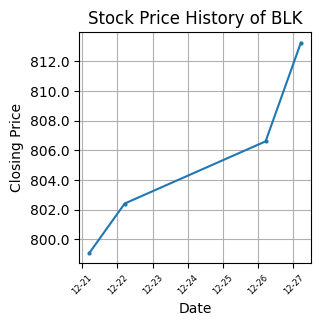

Data fetched for BLK, entries: 183


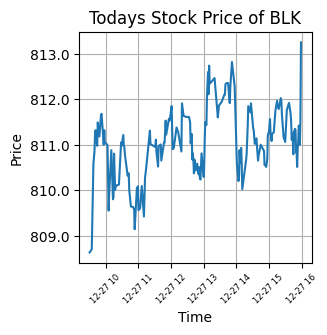

Options data for MKSI:
Average IV for Calls: 0.4661923909730975
Average IV for Puts: 0.5705392376893675
Total Call Volume: 177.0
Total Call open interest: 2306
Total Call engagement: 2483.0
Total Put Volume: 335.0
Total Put open interest: 2557
Total Put engagement: 2892.0
Number of ITM Call Options: 32
Number of ITM Put Options: 4


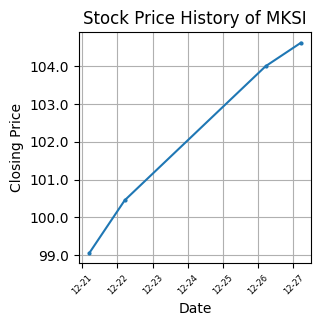

Data fetched for MKSI, entries: 274


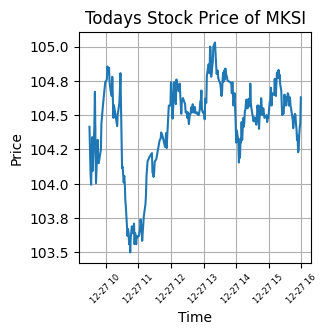

Options data for DAL:
Average IV for Calls: 0.5061808472615329
Average IV for Puts: 0.4846177455592181
Total Call Volume: 17867.0
Total Call open interest: 407419
Total Call engagement: 425286.0
Total Put Volume: 15174.0
Total Put open interest: 373611
Total Put engagement: 388785.0
Number of ITM Call Options: 193
Number of ITM Put Options: 135


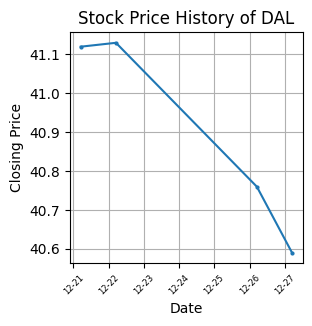

Data fetched for DAL, entries: 390


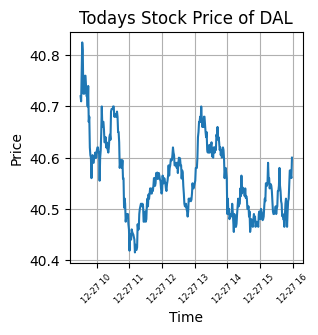

Options data for UNTY:
Average IV for Calls: nan
Average IV for Puts: 0.7347449645996095
Total Call Volume: 9.0
Total Call open interest: 10.0
Total Call engagement: 19.0
Total Put Volume: 1.0
Total Put open interest: 16
Total Put engagement: 17.0
Number of ITM Call Options: 2
Number of ITM Put Options: 0


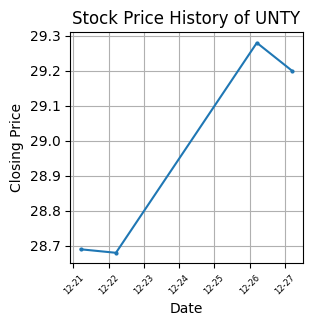

Data fetched for UNTY, entries: 19


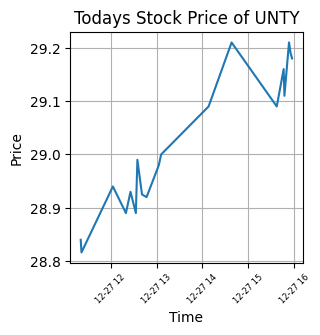

Options data for WEN:
Average IV for Calls: 0.434144539431177
Average IV for Puts: 0.4338093601726151
Total Call Volume: 1027.0
Total Call open interest: 21586
Total Call engagement: 22613.0
Total Put Volume: 2398.0
Total Put open interest: 20603
Total Put engagement: 23001.0
Number of ITM Call Options: 28
Number of ITM Put Options: 32


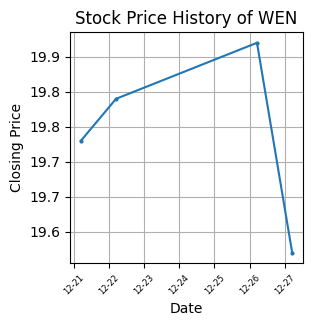

Data fetched for WEN, entries: 389


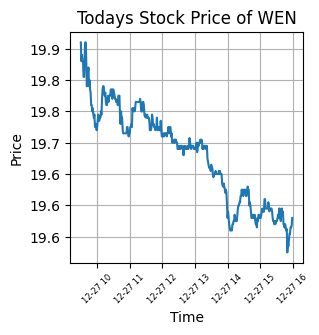

Options data for BMRA:
Average IV for Calls: 2.656252335611979
Average IV for Puts: 2.085940390625
Total Call Volume: 30.0
Total Call open interest: 2368
Total Call engagement: 2398.0
Total Put Volume: 5.0
Total Put open interest: 31
Total Put engagement: 36.0
Number of ITM Call Options: 0
Number of ITM Put Options: 6


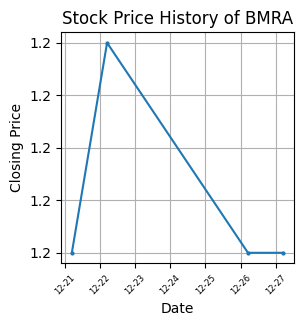

Data fetched for BMRA, entries: 125


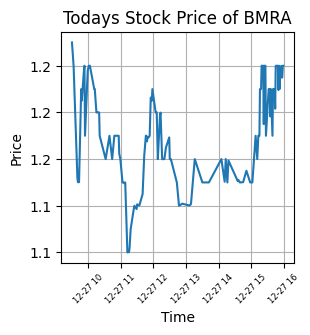

Options data for PLG:
Average IV for Calls: 1.5260441927083332
Average IV for Puts: 1.1892378645833332
Total Call Volume: 204
Total Call open interest: 2657
Total Call engagement: 2861
Total Put Volume: 15.0
Total Put open interest: 201
Total Put engagement: 216.0
Number of ITM Call Options: 0
Number of ITM Put Options: 5


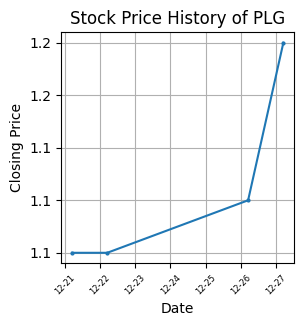

Data fetched for PLG, entries: 109


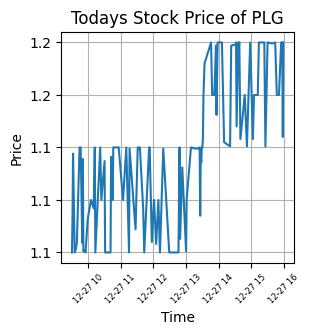

Options data for FRCB:
Average IV for Calls: 9.778161152129119
Average IV for Puts: 0.0
Total Call Volume: 468
Total Call open interest: 63446
Total Call engagement: 63914
Total Put Volume: 109.0
Total Put open interest: 9710
Total Put engagement: 9819.0
Number of ITM Call Options: 0
Number of ITM Put Options: 40


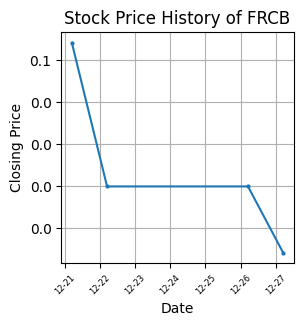

Data fetched for FRCB, entries: 332


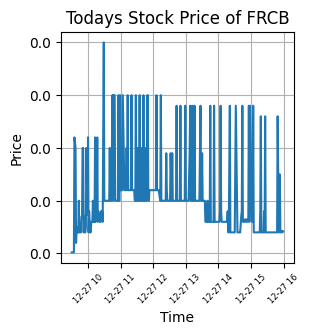

In [1]:
from datetime import datetime, timedelta
from analyze_stock import *  
from scrape_url import *

# Call the function and store the result
day = '2024-01-11'

# Set the time frame
date = datetime.strptime(day, '%Y-%m-%d')
end_date = date + timedelta(days=7)
start_date = date - timedelta(days=21)

# Check if start_date is earlier than today, if not change start_date to today - 7 days
current_date = datetime.now()
start_date = current_date - timedelta(days=14) if start_date >= current_date else start_date

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day
print(url)

ticker_data_list = process_earnings_table(extract_table(url))
    
# Second page
url += '&offset=100&size=100'

ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if pd.isna(options_metrics['avg_put_implied_volatility']):
        continue
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    get_info(ticker, options_metrics, start_date, end_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted